# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

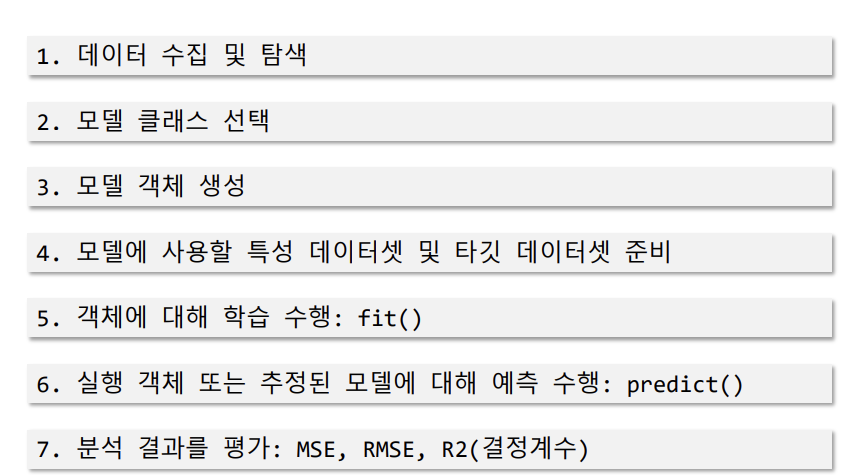

### 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [3]:
beer = pd.read_csv("./data/beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

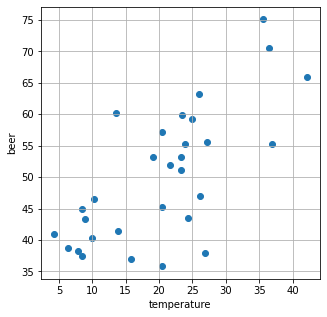

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'], beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [5]:
# 독립 변수, 종속 변수 확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [6]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [7]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer['temperature']).reshape(-1, 1)
y = beer['beer']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                   X, y, test_size=0.2,
                                                   random_state=1)

In [8]:
X_train

array([[36.9],
       [26.9],
       [42.2],
       [21.6],
       [ 7.9],
       [15.8],
       [10. ],
       [23.9],
       [13.5],
       [27.2],
       [23.3],
       [26. ],
       [ 8.9],
       [25. ],
       [13.9],
       [20.5],
       [23.5],
       [ 6.4],
       [36.4],
       [ 8.5],
       [23.3],
       [24.3],
       [19.1],
       [ 4.2]])

In [9]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [10]:
y_train

26    55.3
3     38.0
24    66.0
22    51.9
23    38.2
4     37.0
2     40.4
25    55.3
6     60.2
18    55.6
13    53.2
7     63.3
27    43.3
1     59.3
16    41.5
0     45.3
15    59.9
29    38.8
28    70.5
9     44.9
8     51.1
12    43.5
11    53.2
5     40.9
Name: beer, dtype: float64

In [11]:
y_test

17    75.1
21    35.8
10    47.0
19    57.2
14    37.4
20    46.5
Name: beer, dtype: float64

### 모델 구축

In [12]:
from sklearn.linear_model import LinearRegression

#모델 클래스 선택 후 인스턴스 객체 생성

lr=LinearRegression()

In [13]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [15]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

(array([0.69705648]), 36.066665415661056)

In [18]:
#회귀식
print("y = {:.2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

y = 0.70X + 36.067


In [19]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))

[60.81 50.36 54.33 50.36 41.92 43.18]


### 모델 성능 평가

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

print("MSE: ", np.round(mse, 3))
print("RMSE: ", np.round(rmse, 3))

MSE:  91.347
RMSE:  9.558


In [21]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("R2: ", np.round(r2, 3))

R2:  0.485


### 시각화

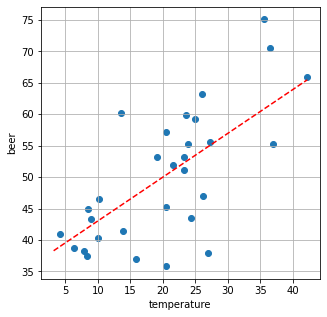

In [22]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
xx = np.arange(beer['temperature'].min()-1,
               beer['temperature'].max()+1)
yy = reg.predict(xx.reshape(len(xx), 1))

plt.plot(xx, yy, linestyle='--', color='red')

# 수집한 데이터셋 시각화
plt.scatter(beer['temperature'], beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

# 응용1. 나이, 키의 관계를 회귀 분석

In [25]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [27]:
data_df = pd.read_csv("./data/age_height.csv" )
data_df

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

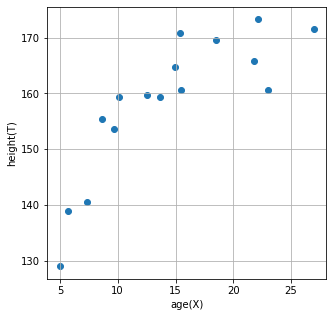

In [28]:
# 데이터 분포 시각화
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'], data_df['height(T)'])
plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.grid()
plt.show()

In [30]:
# 독립 변수, 종속 변수 확인
data_df['age(X)']

0     15.425550
1     23.008112
2      5.002859
3     12.558314
4      8.668897
5      7.308465
6      9.656505
7     13.639018
8     14.919187
9     18.470418
10    15.479863
11    22.130488
12    10.111306
13    26.952936
14     5.684690
15    21.761688
Name: age(X), dtype: float64

In [31]:
# 종속 변수 확인, 레코드 수 확인
print(data_df['height(T)'])
print(len(data_df))

0     170.910131
1     160.675599
2     129.002066
3     159.701396
4     155.460589
5     140.561344
6     153.654664
7     159.429396
8     164.704239
9     169.645276
10    160.712575
11    173.287099
12    159.311932
13    171.517573
14    138.957043
15    165.874407
Name: height(T), dtype: float64
16


#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [32]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X = np.array(data_df['age(X)']).reshape(-1, 1)
y = data_df['height(T)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                   X, y, test_size=0.2,
                                                   random_state=1)

In [ ]:
#####모델 구축 및 예측

In [33]:
#모델 객체 생성 및 학습
from sklearn.linear_model import LinearRegression

# 모델 클래스 선택 후 인스턴스 객체 생성
lr_df=LinearRegression()

# 학습 수행
reg_df = lr_df.fit(X_train, y_train)

# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg_df.coef_, reg_df.intercept_

#회귀식
print("y = {:.2f}X + {:.3f}".format(reg_df.coef_[0], reg_df.intercept_))


# 예측 수행
# 구축된 모델에서 예측 수행
y_pred_df = reg_df.predict(X_test)
print(np.round(y_pred_df, 2))

y = 1.44X + 138.784
[156.85 177.56 158.41 145.98]


In [47]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#MSE
mse = mean_squared_error(y_test, y_pred_df)
print("MSE: ", np.round(mse, 3))

#RMSE : numpy의 sqrt() 함수 사용
#RMSE
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

print("coef: ", reg_df.coef_)
print("intercept: ", np.round(reg_df.intercept_,3))

#결정계수 R2
r2 = r2_score(y_test, y_pred_df)
print("R2: ", np.round(r2, 3))

#회귀식
print("y = {:2f}X + {:.3f}".format(reg_df.coef_[0], reg_df.intercept_))

MSE:  83.495
RMSE:  9.138
coef:  [1.43863478]
intercept:  138.784
R2:  0.663
y = 1.438635X + 138.784


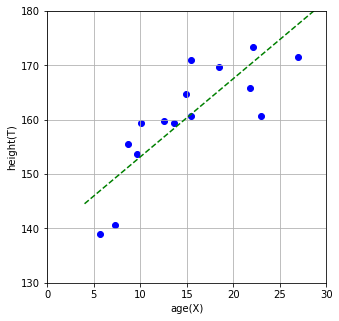

In [64]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize=(5,5))

#데이터 찍기
plt.scatter(data_df['age(X)'], data_df['height(T)'], color='blue')

#회귀선 긋기
xx_df = np.arange(data_df['age(X)'].min()-1, data_df['height(T)'].max()+1)
yy_df = reg_df.predict(xx_df.reshape(len(xx_df), 1))
plt.plot(xx_df, yy_df, linestyle='--', color='g')

plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.xlim(0,30)
plt.ylim(130,180)
plt.grid()
plt.show()

# < 스탯츠모델에서 단순선형회귀 수행>

In [67]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('./data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
import numpy as np
X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, test_size=0.2,
                                                    random_state=1)
X_train = sm.add_constant(X_train) #상수항 결합으로 독립변수에 데이터를 추가

In [68]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [69]:
X_train

array([[ 1. , 36.9],
       [ 1. , 26.9],
       [ 1. , 42.2],
       [ 1. , 21.6],
       [ 1. ,  7.9],
       [ 1. , 15.8],
       [ 1. , 10. ],
       [ 1. , 23.9],
       [ 1. , 13.5],
       [ 1. , 27.2],
       [ 1. , 23.3],
       [ 1. , 26. ],
       [ 1. ,  8.9],
       [ 1. , 25. ],
       [ 1. , 13.9],
       [ 1. , 20.5],
       [ 1. , 23.5],
       [ 1. ,  6.4],
       [ 1. , 36.4],
       [ 1. ,  8.5],
       [ 1. , 23.3],
       [ 1. , 24.3],
       [ 1. , 19.1],
       [ 1. ,  4.2]])

In [70]:
# 스탯츠모델
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

lr = sm.OLS(y_train, X_train)

reg = lr.fit()

In [73]:
# 성능 평가
reg.summary()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           9.50e-05
Time:                        15:53:57   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 보스턴 집값 선형 회귀

### 데이터 수집

In [75]:
from sklearn.datasets import load_boston

boston = load_boston()

### 데이터 탐색

In [76]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [77]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [80]:
print(boston.data[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [82]:
print(boston.target[:5])

[24.  21.6 34.7 33.4 36.2]


In [83]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [78]:
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [79]:
X = pd.DataFrame(df['RM']) #df['RM']이면 Series
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [87]:
y = boston.target
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

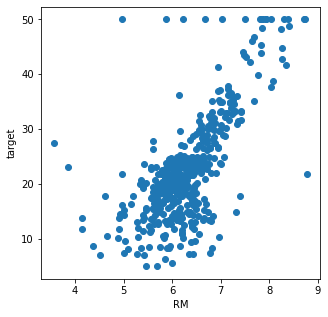

In [89]:
# 데이터 탐색

plt.figure(figsize=(5,5))
plt.scatter(X, y)
plt.xlabel('RM')
plt.ylabel('target')
plt.show()

### 학습용/ 검증용 데이터 분리

In [90]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라


# 전체 데이터 중 70%는 학습용, 30%는 검증용으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                   X, y, test_size=0.3,
                                                   random_state=1)

### 모델 구축

In [91]:
#모델 객체 생성 및 학습
from sklearn.linear_model import LinearRegression

# 모델 클래스 선택 후 인스턴스 객체 생성
lr=LinearRegression()
# 학습 수행
reg = lr.fit(X_train, y_train) #reg = LinearRegression().fit(X_train, y_train)

# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

#회귀식
print("y = {:.2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))


# 예측 수행
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))

y = 8.46X + -30.571
[27.38 26.08 20.45 19.16 14.8  23.34 25.53 20.8  19.78 23.72 26.54 27.59
 17.92 18.39 20.39 16.88 25.69 43.25 21.57 11.11 17.7  17.05 24.99 23.71
 22.65 19.32 21.01 20.31 33.06 15.03 25.09 16.85 37.41 22.32 21.41 19.57
 23.08 29.9   4.44 21.16 23.01 22.82 25.42 21.57 21.76 27.17 35.44 19.24
 21.05 23.62 28.49 23.22 23.83 22.89 12.52 24.05 18.94 21.23 20.11 39.21
 23.67 25.53 18.05 23.14 15.22 28.49 39.97 24.76 20.27 18.96 22.84  8.79
 11.42 25.9  21.27 18.18 28.79 24.03 24.51 29.91 23.84 20.37 30.22 25.52
 24.34 23.11 23.72 23.84 18.45 23.03 28.45 43.07 20.05 20.3  21.9  20.27
 25.21 23.94 39.37 21.85 18.82 24.3  21.63 21.42 14.08 22.16 16.51 22.31
 21.49 26.8  32.63 23.72 21.83 32.21 31.47 30.16 20.07 15.59 28.86 39.63
 19.08 26.36 26.71 22.32 24.98 20.36 21.27 21.21 16.57 26.35 18.38 23.43
 21.98 12.04 25.43 30.65 15.14 19.99 35.13 28.39 19.65 21.47 18.81 24.27
 27.48 21.11 23.8  20.22 25.48 19.87 30.37 18.61]


### 모델 평가

In [92]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", np.round(mse, 3))

#RMSE : numpy의 sqrt() 함수 사용
#RMSE
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

print("coef: ", reg.coef_)
print("intercept: ", np.round(reg.intercept_,3))

#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("R2: ", np.round(r2, 3))

#회귀식
print("y = {:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

MSE:  36.517
RMSE:  6.043
coef:  [8.46109164]
intercept:  -30.571
R2:  0.602
y = 8.461092X + -30.571


### 시각화

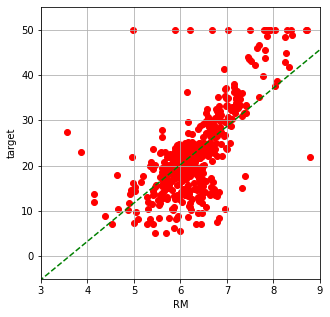

In [104]:
#데이터 및 회귀식 시각화
plt.figure(figsize=(5,5))

#데이터 찍기
plt.scatter(X, y, color='red')

#회귀선 긋기
xx = np.arange(X['RM'].min()-1, y.max()+1)
yy = reg.predict(xx.reshape(49, 1))
plt.plot(xx, yy, linestyle='--', color='g')

plt.xlabel('RM')
plt.ylabel('target')
plt.xlim(3,9)
plt.ylim(-5,55)
plt.grid()
plt.show()

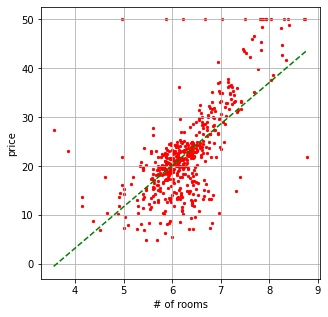

In [106]:
plt.figure(figsize=(5,5))
plt.scatter(X, y, c='r', s=5)

xx = np.linspace(X.min(), X.max())
yy = reg.predict(xx.reshape(len(xx), 1))
plt.plot(xx, yy, linestyle='--', color='g')
plt.xlabel('# of rooms')
plt.ylabel('price')
plt.grid()
plt.show()